In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

El cero con una tolerancia de 1 es 1.75
El cero con una tolerancia de 0.1 es 1.9893617021276597
El cero con una tolerancia de 0.01 es 1.9978678038379531
El cero con una tolerancia de 0.001 es 1.9999146684870721
El cero con una tolerancia de 0.0001 es 1.9999829334061507
El cero con una tolerancia de 1e-05 es 1.9999993173334498
El cero con una tolerancia de 1e-06 es 1.9999998634666714
El cero con una tolerancia de 1e-07 es 1.9999999945386666
El cero con una tolerancia de 1e-08 es 1.9999999989077333
El cero con una tolerancia de 1e-09 es 1.9999999997815467


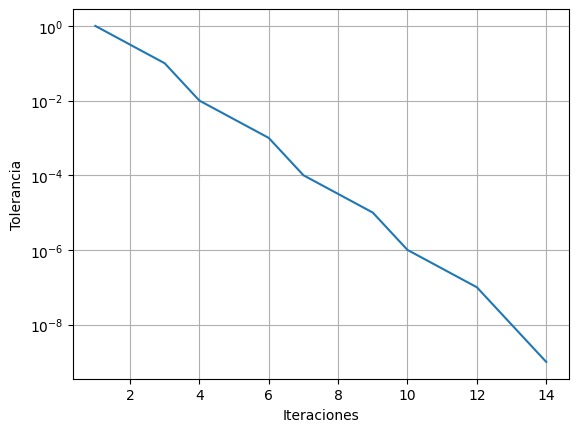

Cuando la tolerancia es un valor más pequeño requiere más iteraciones


In [66]:
def regula(f,a,b, tol=1e-8,maxiter=100):
  """
  retorna el cero que debe haber entre dos puntos a y b
  f:Función a evaluar
  a:punto inicial del intervalo en el que debe estar el cero
  b:punto final del intervalo en el que debe estar el cero
  f(a) y f(b) deben tener signos distintos
  """
  if f(a)*f(b)>0:
    raise ValueError("f(a) y f(b) deben tener signos distintos")
  iter=1
  for i in range(maxiter):
    c=b-(f(b)*(b-a))/(f(b)-f(a))  #Es muy parecida a la bisección, solo que c tiene esa fórmula en lugar del punto medio
    if abs(f(c))<tol:
      return c, iter
    elif f(a)*f(c)<0:
      b=c
    elif f(b)*f(c)<0:
      a=c
    iter+=1
f= lambda x: x**2 - 4

x=[]
y=[]
for i in range(10):
  x.append(regula(f,1,3, tol = 10**(-i) )[1])
  y.append(10**(-i))
  print(f"El cero con una tolerancia de {10**(-i)} es {regula(f,1,3, tol = 10**(-i) )[0]}")
plt.semilogy(x,y)
plt.xlabel("Iteraciones")
plt.ylabel("Tolerancia")
plt.grid()
plt.show()
print("Cuando la tolerancia es un valor más pequeño requiere más iteraciones")

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

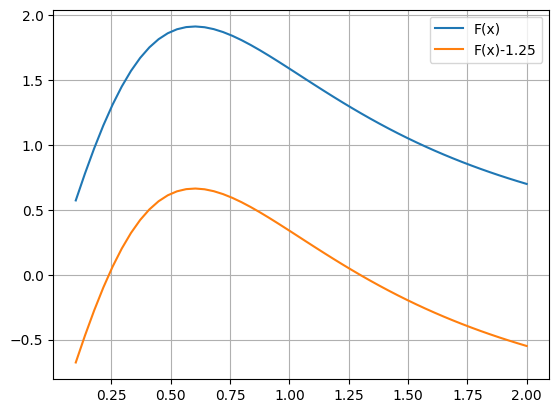

Los valores encontrados de x para que la fuerza sea de 1.25N, con el método de Newton-Raphson son 0.2394m y 1.2974m
Los valores encontrados de x para que la fuerza sea de 1.25N, con el método de la bisecante son 0.2394m y 1.2974m
1.25
Cuando el radio es 0 el valor de la fuerza es 62.7057N, si se evalúa la fuerza que ejerce una carga puntual Q a la misma distancia x se obtiene 62.7057N. Es claro que cuando el radio tiende a cero la fuerza que ejerce el 'anillo' sobre q es como la de una carga puntual


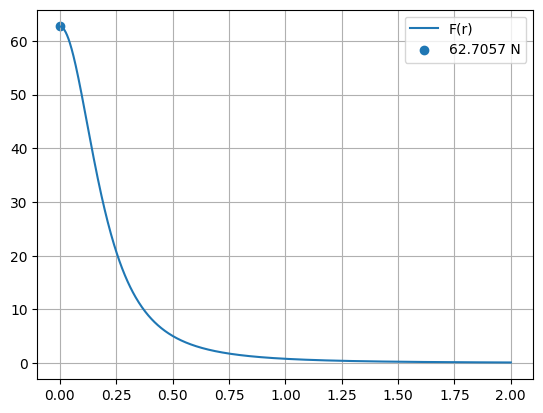

Al aumentar el radio disminuye la fuerza que el anillo ejerce sobre la carga puntual 


In [27]:
F=lambda x: (2e-5*2e-5*x)/((4*np.pi*8.854e-12)*(x**2+0.85**2)**(3/2))
x=np.linspace(0.1,2)

plt.plot(x,F(x), label="F(x)")

zero=lambda x: F(x)-1.25 #Nueva función para encontrar el cero

plt.plot(x,zero(x), label="F(x)-1.25")  #Grafiqué para poder ver mejor dónde estarían los ceros
plt.grid()
plt.legend()
plt.show()

from scipy.optimize import newton, bisect


print(f"Los valores encontrados de x para que la fuerza sea de 1.25N, con el método de Newton-Raphson son {round(newton(zero, 0),4)}m y {round(newton(zero,1),4)}m")
print(f"Los valores encontrados de x para que la fuerza sea de 1.25N, con el método de la bisecante son {round(bisect(zero, 0,0.5),4)}m y {round(bisect(zero,1,1.5),4)}m")

Efe=lambda r:(2e-5*2e-5*float(newton(zero, 0)))/((4*np.pi*8.854e-12)*(float(newton(zero, 0))**2+r**2)**(3/2)) #Ahora se mantiene una x constante y se varía el radio
punto=lambda x:(2e-5*2e-5)/((4*np.pi*8.854e-12)*float(newton(zero, 0))**2) #Para comparar con el aro de radio 0
print(round(Efe(0.85),4)) #Para confirmar el valor con el radio que habían dado previamente
print(f"Cuando el radio es 0 el valor de la fuerza es {round(Efe(0),4)}N, si se evalúa la fuerza que ejerce una carga puntual Q a la misma distancia x se obtiene {round(punto(newton(zero, 0)),4)}N. Es claro que cuando el radio tiende a cero la fuerza que ejerce el 'anillo' sobre q es como la de una carga puntual" ) #En el denominador queda solo x**2 y las constantes
r=np.linspace(0,2,1000)

plt.plot(r,Efe(r), label="F(r)")
plt.grid()
plt. scatter(0,Efe(0), label=f"{round(Efe(0),4)} N")
plt.legend()
plt.show()

print("Al aumentar el radio disminuye la fuerza que el anillo ejerce sobre la carga puntual ")

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



<ipython-input-80-8a8829579b74>:6: RuntimeWarning: invalid value encountered in log
  v=lambda t: u*np.log(m0/(m0-q*t))-g*t


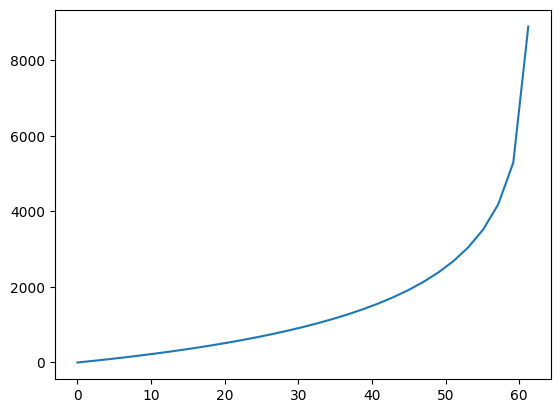

Newton-Raphson: 26.4078s, Bisección: 26.4078s, Regula Falsi: 26.4078s.
Cuando la velocidad a la que expulsa el combustible es 2244m/s el teimpo que se demora es 21.4219s
Cuando la velocidad a la que expulsa el combustible es 2427m/s el teimpo que se demora es 19.841s
Cuando la velocidad a la que expulsa el combustible es 3160m/s el teimpo que se demora es 15.2454s
Cuando la velocidad a la que expulsa el combustible es 3242m/s el teimpo que se demora es 14.8559s
Cuando la velocidad a la que expulsa el combustible es 4168m/s el teimpo que se demora es 11.5079s
Cuando la velocidad a la que expulsa el combustible es 4230m/s el teimpo que se demora es 11.3358s
Cuando la velocidad a la que expulsa el combustible es 4474m/s el teimpo que se demora es 10.705s
Cuando la velocidad a la que expulsa el combustible es 4600m/s el teimpo que se demora es 10.4056s
Cuando la velocidad a la que expulsa el combustible es 4903m/s el teimpo que se demora es 9.7489s
Cuando la velocidad a la que expulsa el c

In [80]:
m0=1.6e5
u=1800
q=2600
g=9.81

v=lambda t: u*np.log(m0/(m0-q*t))-g*t

t=np.linspace(0,100)
plt.plot(t,v(t))
plt.show()

sc=lambda t: u*np.log(m0/(m0-q*t))-g*t-750
print(f"Newton-Raphson: {round(newton(sc,0),4)}s, Bisección: {round(bisect(sc,0,30),4)}s, Regula Falsi: {round(regula(sc,0,30)[0],4)}s.")

import random
ul=[]
for i in range(20):
  ul.append(random.randint(1800,6324))
ul.sort()

for i in ul:
  u=i
  print(f"Cuando la velocidad a la que expulsa el combustible es de {i}m/s el tiempo que se demora es {round(newton(sc,0),4)}s")
print("Entre mayor sea u más rápido va a llegar a la velocidad deseada")